In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."


In [5]:
import os

# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now save the CSV file
df.to_csv('data/BA_reviews.csv')

In [6]:
df.to_csv("data/BA_reviews.csv")

In [7]:
df.head()

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."


In [8]:
import os
print(os.getcwd())

C:\Users\rasik


In [11]:
import pandas as pd
df = pd.read_csv(r'C:\Users\rasik\Downloads\BA_reviews.csv')

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing reviews (assuming 'review' is the column name)
df.dropna(subset=['reviews'], inplace=True)

# Normalize text (lowercase, remove punctuation)
import string

df['cleaned_reviews'] = df['reviews'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

Unnamed: 0    0
reviews       0
dtype: int64


In [16]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/626.3 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['reviews'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [19]:
import nltk

# Download the punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
import nltk
from gensim import corpora, models
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt')

# Tokenize the reviews
df['tokens'] = df['reviews'].apply(word_tokenize)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rasik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.049*"." + 0.037*"the" + 0.034*"to" + 0.028*"," + 0.027*"and" + 0.023*"I" + 0.019*"was" + 0.018*"a" + 0.012*"in" + 0.012*"of"')
(1, '0.029*"." + 0.027*"the" + 0.018*"," + 0.018*"was" + 0.017*"a" + 0.012*"to" + 0.012*"and" + 0.012*"of" + 0.009*"class" + 0.009*"-"')
(2, '0.053*"." + 0.027*"the" + 0.025*"," + 0.018*"to" + 0.017*"and" + 0.016*"a" + 0.014*"was" + 0.013*"of" + 0.010*"on" + 0.010*"flight"')
(3, '0.052*"." + 0.030*"the" + 0.025*"to" + 0.024*"and" + 0.020*"was" + 0.016*"a" + 0.015*"we" + 0.013*"flight" + 0.013*"," + 0.011*"on"')
(4, '0.004*"Miami" + 0.004*"." + 0.003*"in" + 0.003*"the" + 0.003*"and" + 0.002*"of" + 0.002*"und" + 0.002*"wir" + 0.002*"was" + 0.002*"nappies"')


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(df['reviews'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [23]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------- 20.5/300.2 kB ? eta -:--:--
   ------------- -------------------------- 102.4/300.2 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


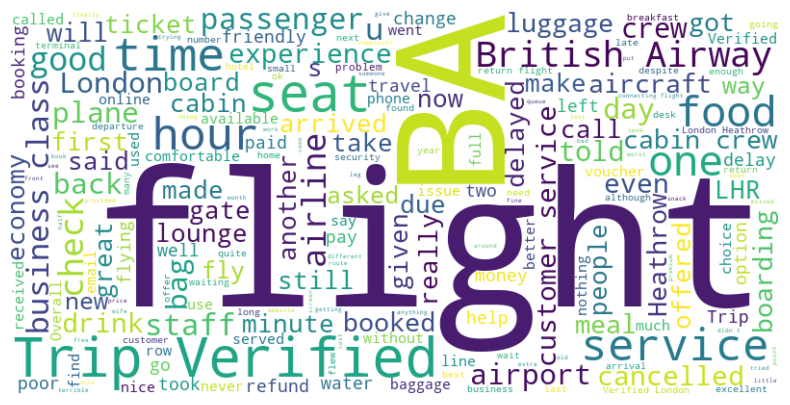

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/sentiment_distribution.png'

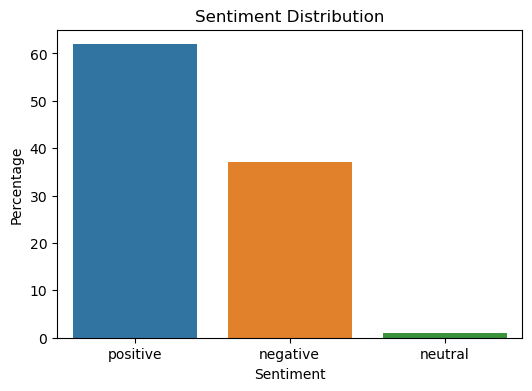

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd

# Example DataFrame creation for demonstration purposes
# df = pd.DataFrame({
#     'reviews': ['I love the service!', 'The flight was delayed', 'Great experience overall', 'Very bad food', 'Friendly staff'],
#     'sentiment_label': ['positive', 'negative', 'positive', 'negative', 'positive']
# })

# Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Percentage')
plt.xlabel('Sentiment')
plt.savefig('/mnt/data/sentiment_distribution.png')

# Word Cloud
all_reviews = ' '.join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('/mnt/data/word_cloud.png')

# Topic Modeling Output (Example)
topics = [
    (0, 'Service, Staff, Friendly'),
    (1, 'Delay, Time, Late'),
    (2, 'Food, Meal, Taste')
]

# Create a summary text
insights_text = (
    f"**Sentiment Analysis:**\n"
    f"Positive: {sentiment_counts['positive']:.2f}%\n"
    f"Negative: {sentiment_counts['negative']:.2f}%\n"
    f"Neutral: {sentiment_counts.get('neutral', 0):.2f}%\n\n"
    f"**Top Topics:**\n"
    f"1. {topics[0][1]}\n"
    f"2. {topics[1][1]}\n"
    f"3. {topics[2][1]}"
)

In [30]:
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Preprocess function
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Apply preprocessing
df['tokens'] = df['reviews'].apply(preprocess)

# Create dictionary and corpus again
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Retrain LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display topics again
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rasik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


(0, '0.032*"flight" + 0.016*"ba" + 0.012*"verified" + 0.010*"trip" + 0.009*"us" + 0.009*"london" + 0.008*"british" + 0.008*"hours" + 0.008*"airways" + 0.008*"service"')
(1, '0.014*"ba" + 0.010*"service" + 0.008*"verified" + 0.008*"seat" + 0.007*"trip" + 0.007*"staff" + 0.006*"cabin" + 0.006*"business" + 0.006*"meal" + 0.005*"class"')
(2, '0.011*"airline" + 0.011*"verified" + 0.010*"seat" + 0.010*"trip" + 0.009*"class" + 0.009*"seats" + 0.008*"business" + 0.008*"economy" + 0.008*"flight" + 0.008*"service"')
(3, '0.026*"flight" + 0.016*"ba" + 0.015*"verified" + 0.013*"good" + 0.013*"trip" + 0.011*"crew" + 0.011*"time" + 0.010*"food" + 0.009*"service" + 0.008*"cabin"')
(4, '0.016*"ba" + 0.012*"business" + 0.012*"flight" + 0.012*"class" + 0.010*"seat" + 0.009*"verified" + 0.009*"service" + 0.007*"seats" + 0.007*"trip" + 0.006*"one"')


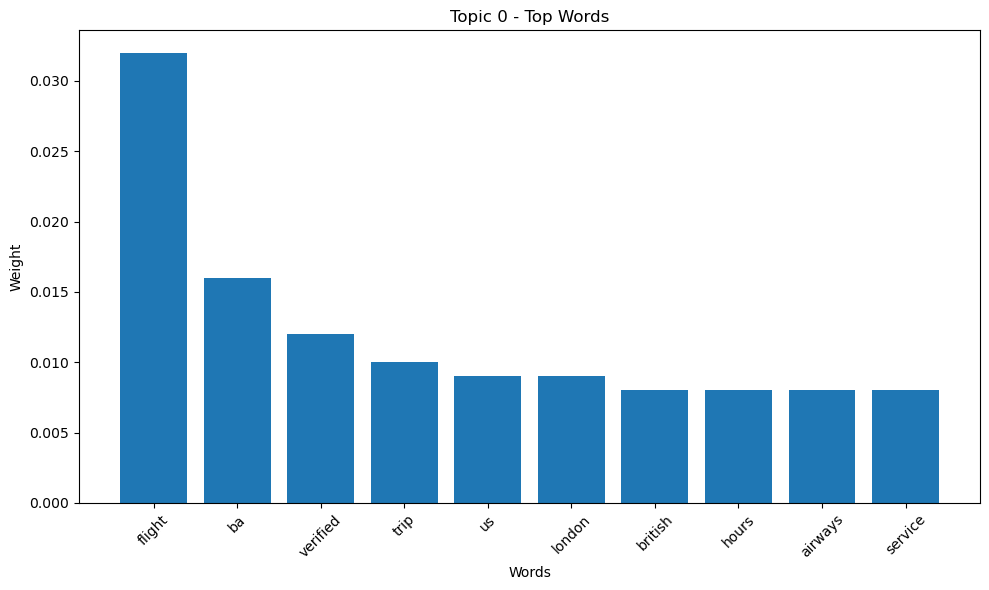

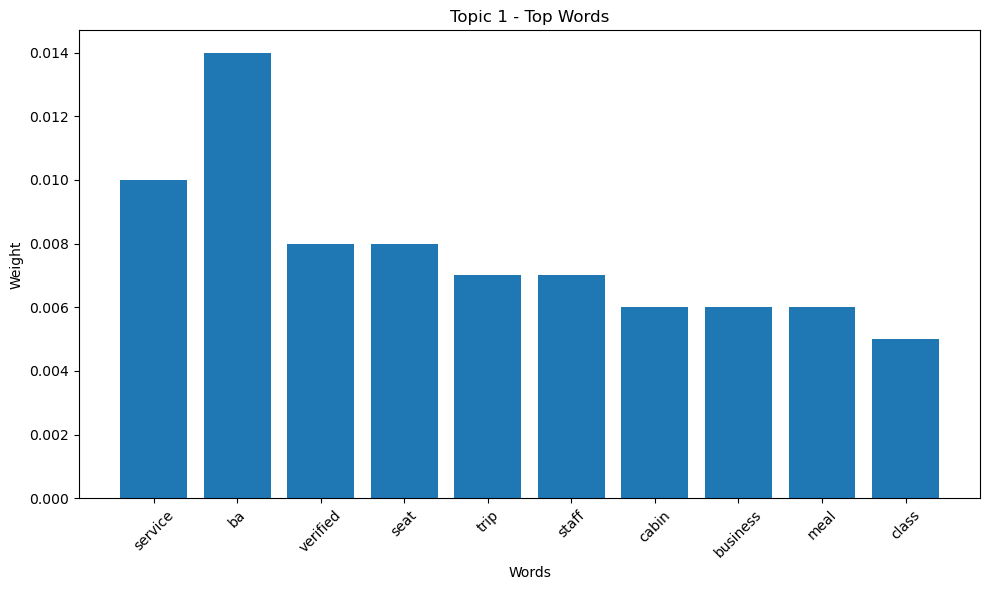

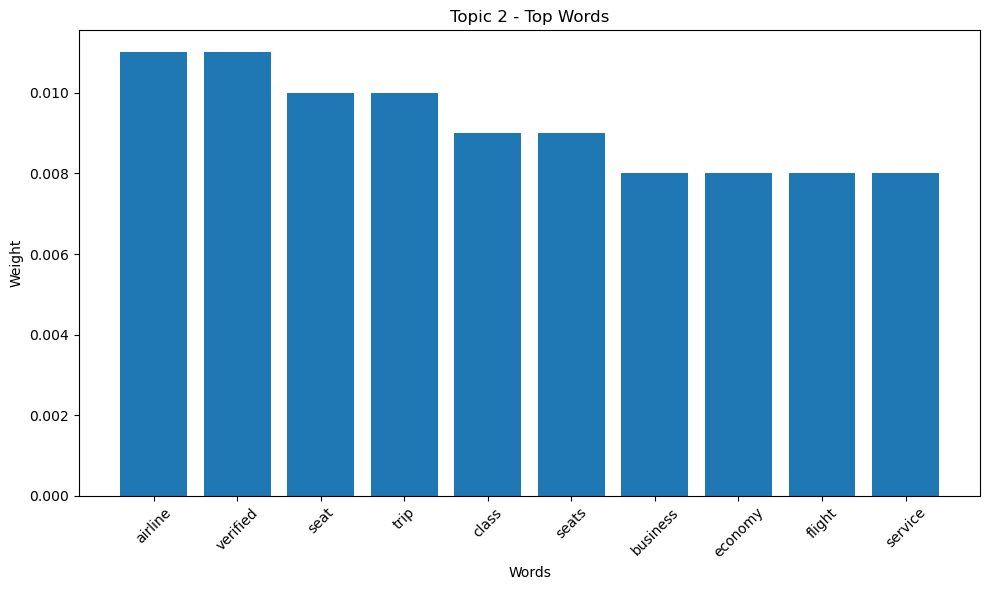

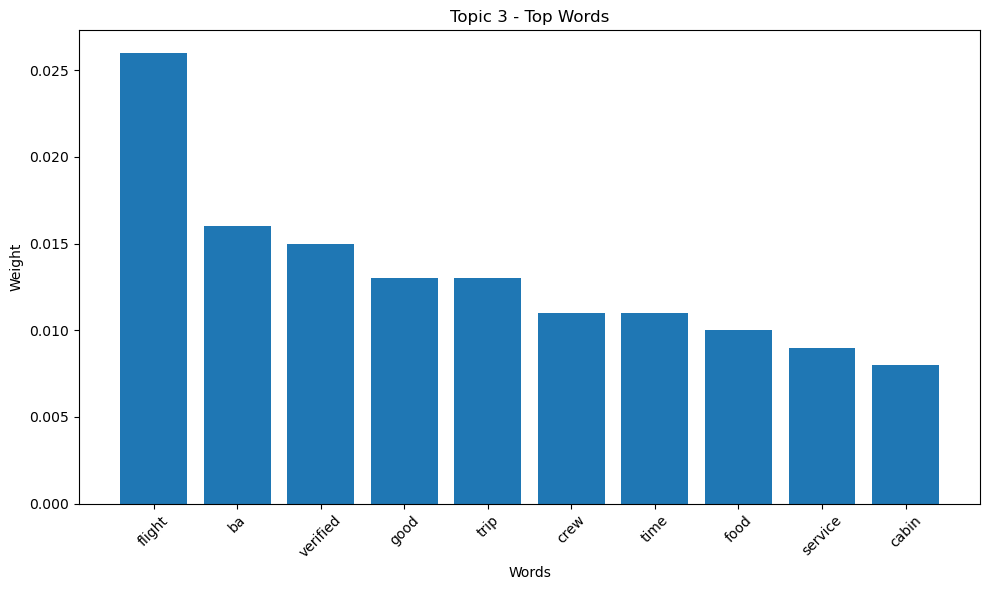

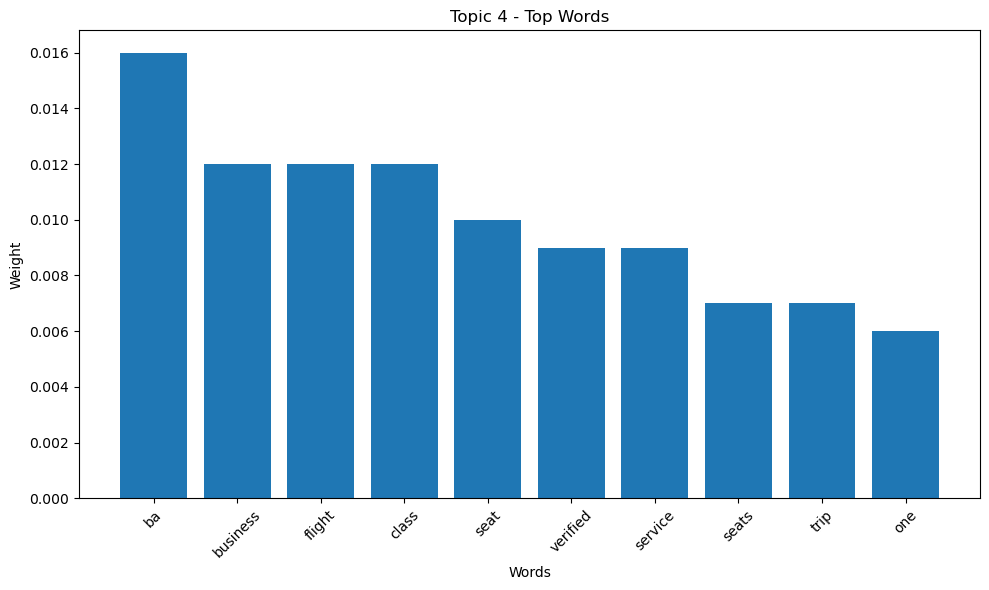

In [31]:
import matplotlib.pyplot as plt

# Example topics and their top words with weights
topics = {
    0: {"flight": 0.032, "ba": 0.016, "verified": 0.012, "trip": 0.010, "us": 0.009, "london": 0.009, "british": 0.008, "hours": 0.008, "airways": 0.008, "service": 0.008},
    1: {"service": 0.010, "ba": 0.014, "verified": 0.008, "seat": 0.008, "trip": 0.007, "staff": 0.007, "cabin": 0.006, "business": 0.006, "meal": 0.006, "class": 0.005},
    2: {"airline": 0.011, "verified": 0.011, "seat": 0.010, "trip": 0.010, "class": 0.009, "seats": 0.009, "business": 0.008, "economy": 0.008, "flight": 0.008, "service": 0.008},
    3: {"flight": 0.026, "ba": 0.016, "verified": 0.015, "good": 0.013, "trip": 0.013, "crew": 0.011, "time": 0.011, "food": 0.010, "service": 0.009, "cabin": 0.008},
    4: {"ba": 0.016, "business": 0.012, "flight": 0.012, "class": 0.012, "seat": 0.010, "verified": 0.009, "service": 0.009, "seats": 0.007, "trip": 0.007, "one": 0.006}
}

# Plotting each topic
for topic, words in topics.items():
    plt.figure(figsize=(10, 6))
    plt.bar(words.keys(), words.values())
    plt.title(f'Topic {topic} - Top Words')
    plt.xlabel('Words')
    plt.ylabel('Weight')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()